In [1]:
# Set up imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set up the parameters
# setup params for brownian motion
s0 = 131.00
sigma = 0.25 # percentage volatility
mu = 0.35 # drift

# set up the simulation
paths = 1000
delta = 1.0/252.0
time = 252 * 5

In [4]:
# Build functions

def wiener_process(delta, sigma, time, paths):
    """Returns a Wiener process

    Parameters
    ----------
    delta : float
        The increment to downsample sigma
    sigma : float
        Percentage volatility
    time : int
        Number of samples to create
    paths : int
        Number of price simulations to create

    Returns
    -------
    wiener_process : np.ndarray

    Notes
    -----
    This method returns a Wiener process.
    The Wiener process is also called Brownian
    motion. For more information about the
    Wiener process check out the Wikipedia
    page: http://en.wikipedia.org/wiki/Wiener_process
    """

    # return an array of samples from a normal distribution
    return sigma * np.random.normal(loc=0, scale=np.sqrt(delta), size=(time, paths))

def gbm_returns(delta, sigma, time, mu, paths):
    """Returns from a Geometric brownian motion

    Parameters
    ----------
    delta : float
        The increment to downsample sigma
    sigma : float
        Percentage volatility
    time : int
        Number of samples to create
    mu : float
        Percentage drift
    paths : int
        Number of price simulations to create

    Returns
    -------
    gbm_returns : np.ndarray

    Notes
    -----
    This method constructs random Geometric Brownian
    Motion (GBM).
    """
    process = wiener_process(delta, sigma, time, paths)
    return np.exp(
        process + (mu - sigma**2 / 2) * delta
    )

def gbm_levels(s0, delta, sigma, time, mu, paths):
    """Returns price paths starting at s0

    Parameters
    ----------
    s0 : float
        The starting stock price
    delta : float
        The increment to downsample sigma
    sigma : float
        Percentage volatility
    time : int
        Number of samples to create
    mu : float
        Percentage drift
    paths : int
        Number of price simulations to create

    Returns
    -------
    gbm_levels : np.ndarray
    """
    returns = gbm_returns(delta, sigma, time, mu, paths)

    stacked = np.vstack([np.ones(paths), returns])
    return s0 * stacked.cumprod(axis=0)

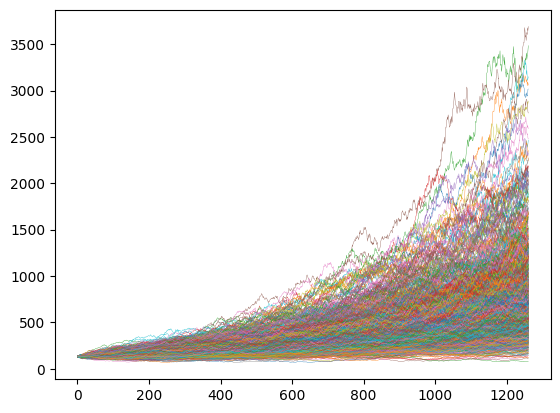

In [5]:
# Visualize the results

price_paths = gbm_levels(s0, delta, sigma, time, mu, paths)
plt.plot(price_paths, linewidth=0.25)
plt.show()

In [6]:
# Count prices that has gone above s0
len(price_paths[-1, price_paths[-1, :] > s0])

996

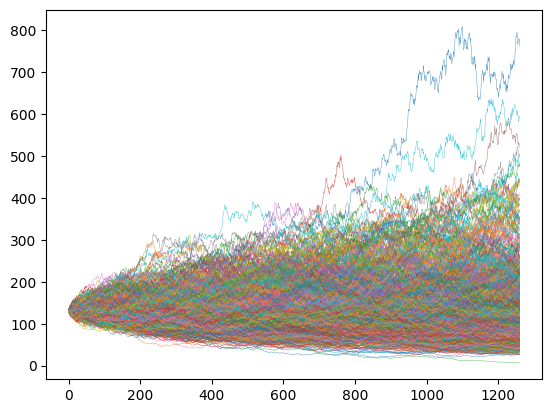

In [7]:
# Set drift to zero
price_paths = gbm_levels(s0, delta, sigma, time, 0.0, paths)
plt.plot(price_paths, linewidth=0.25)
plt.show()

In [8]:
# Count prices that has gone above s0
len(price_paths[-1, price_paths[-1, :] > s0])

380

In [9]:
price_paths

array([[131.        , 131.        , 131.        , ..., 131.        ,
        131.        , 131.        ],
       [130.34429307, 131.255074  , 128.8267677 , ..., 131.84851358,
        128.20821895, 128.35967974],
       [129.57916356, 132.98997272, 131.42920354, ..., 129.41661616,
        130.66376306, 131.00761477],
       ...,
       [114.91000685, 199.66025544,  88.30282171, ..., 109.86317461,
         84.50263242, 208.33909808],
       [113.20226931, 196.50094303,  88.56598245, ..., 110.58826792,
         86.3329367 , 208.49179147],
       [111.80617878, 199.25238157,  85.72227916, ..., 111.40178201,
         86.62546233, 205.6330156 ]])